# **Mini Business Case Study - Sales Analytics for EcoTrek Solutions**

**Case Background**

You are a new hire at EcoTrek Solutions, a U.S.-based company that specializes in eco-friendly travel accessories. As a business data analyst, your role involves analyzing sales trends and providing insights to help shape the company's marketing and production strategies.

**Pandas, Reading/Writing Data Assignment (Due: TUESDAY, 9/9, 11:59 pm.)**



You, the business data analyst, wonder if such correlation has more to do with the climate than the products themselves.

You collected temperature data for the last 20 days as well as the daily sales of GreenTote With this data, you will perform the following tasks:

1. create a data frame to store the data read from the file.
2. get a summary of each data field (i.e., the count, mean, standard deviation, minimum, maximum, ... etc. ) and interpret the summary in the Markdown or Text Cell (e.g., what does maximum mean for the daily temperature field?)

3. use the Pearson Correlation function to examine the correlation relationship between daily sold units and daily temperaturll

4. sort the data frame according to the number of units sold per day

5. write the sorted data frame to a csv file named "**GreenTote_analysis_YourLastName_FirstName.csv*

6. based on your analysis, choose one of the following options to recommend to your company: (in the text cell)
- Option 1: Develop a marketing campaign that considers weather information to strategize the sales of GreenTote
- Option 2: Use a random campaign to help increase the sales for the new year*"

**​What to Submit:​**

You can choose to submit a Jupyter Notebook file.

1). Please name your file **YourLastName_FirstInitial_3.ipynb**. In the code, please just use the data file's name (i.e., data are in the local path) .

2). Please submit your data file "**GreenTote_analysis_YourLastName_FirstName.csv**"

3). Please remember to provide your explanation/interpretation in the Text cells

4). Please provide comments in the Code cell to explain what your code does in that cell and run your code before submitting it.

# **Week 4 Pandas, Numpy, and Sentiment Analysis**


**Week 4 Preview**

In [1]:
import pandas as pd

data = {
    'Salesperson': ['Alice', 'Bob', 'Alice', 'Bob', 'Charlie', 'Charlie'],
    'Region': ['North', 'South', 'North', 'North', 'East', 'West'],
    'Sales': [100, 200, 150, 300, 250, 400]
}

df = pd.DataFrame(data)

# Group by Salesperson and calculate total sales
grouped_df = df.groupby('Salesperson')['Sales'].sum()
print(grouped_df)


Salesperson
Alice      250
Bob        500
Charlie    650
Name: Sales, dtype: int64


In [2]:
# Group by Region and calculate total sales, print the result

# Your code starts here

region_df = df.groupby('Region')['Sales'].sum()

# this will get rid of info @ the bottom
#   but you also lose the col headers
#print(region_df.to_string(header=False))

print(region_df)
# Your code ends here

Region
East     250
North    550
South    200
West     400
Name: Sales, dtype: int64


In [3]:
# Group by Salesperson and Region, then calculate the total sales
grouped_df = df.groupby(['Salesperson', 'Region'])['Sales'].sum()
print(grouped_df)


Salesperson  Region
Alice        North     250
Bob          North     300
             South     200
Charlie      East      250
             West      400
Name: Sales, dtype: int64


In [4]:
# Group by Region and Salesperson, then calculate the total sales
grouped_df = df.groupby(['Region', 'Salesperson'])['Sales'].sum()
print(grouped_df)

Region  Salesperson
East    Charlie        250
North   Alice          250
        Bob            300
South   Bob            200
West    Charlie        400
Name: Sales, dtype: int64


In [5]:
# Group by Salesperson and Region, then calculate the maximum sale of the salesperson for that region

 # Your code starts here
sp_region = df.groupby(['Salesperson', 'Region'])['Sales'].max()
print(sp_region)
 # Your code ends here


Salesperson  Region
Alice        North     150
Bob          North     300
             South     200
Charlie      East      250
             West      400
Name: Sales, dtype: int64


In [6]:
import numpy as np

# Create an array
array = np.array([10, 15, 20, 25, 30])

# Create a mask for elements greater than 20
mask = array > 20

print(mask)


[False False False  True  True]


In [7]:
# Using the mask to filter the array
filtered_array = array[mask]

print(filtered_array)


[25 30]


In [8]:
# create an array
array = np.arange(1, 10)  # Creates an array [1, 2, ..., 9]
print(array)
# What does 1 and 10 mean, based on the printed results?
# start and stop (less than)

[1 2 3 4 5 6 7 8 9]


In [9]:
# Reshape a 1D array into a 2D array
reshaped_array = array.reshape(3, 3)
print(reshaped_array)



[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [10]:
# can you reshape the array to 3 X 5?
array = np.arange(1, 16)

reshaped_array = array.reshape(3, 5)
print(reshaped_array)



[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]]


In [11]:
# Can you create an array with 1 column and 9 rows?

# Your code starts here
array = np.arange(1, 10)
reshaped_array = array.reshape(9, 1)

print(reshaped_array)
# Your code ends here


[[1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]


In [12]:
reshaped_array = array.reshape(3, 3)


# Sum across the rows (axis=1)
row_sums = reshaped_array.sum(axis=1)
print(row_sums)

# Sum across the columns (axis=0)
column_sums = reshaped_array.sum(axis=0)
print(column_sums)


[ 6 15 24]
[12 15 18]


# **Text Analysis in Python - Quick Introduction**


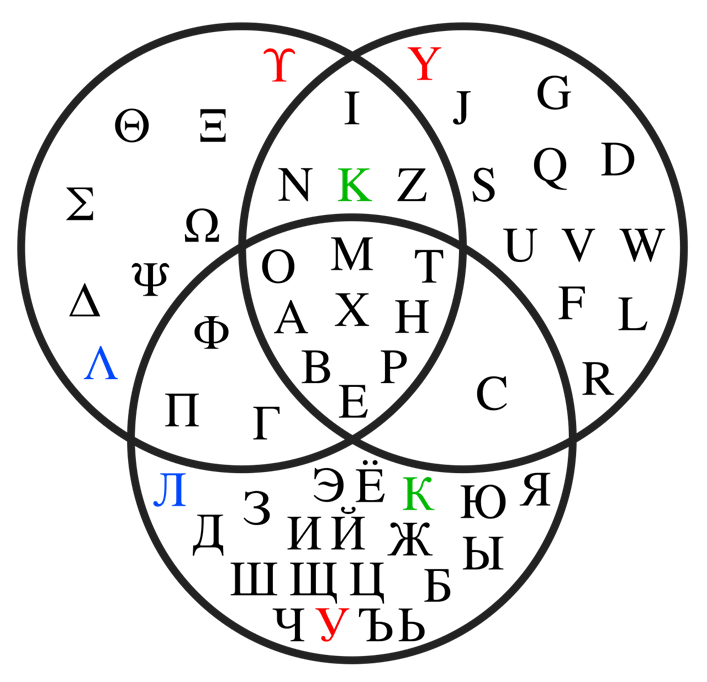

Image credit: Tilman Piesk (Wikipedia)


# Text -> ... -> Knowledge

Step 1: tokenize the text <br><br>

Step 2: clean the tokens <br><br>

Step 3+: analyze the list of tokens <br><br>



**Tokenization (AKA word segmentation)**

Tokenization is a process to separate the characters into individual words. It may be more difficult/messy than you think :)


English: Words are separated by “white space” or by special characters
No white space in Japanese

In German, complex compound words – “Lebensversicherungsgesellschafts"


<br>

**How many tokens in this sentence?**

Ain’t isn’t well-known among my co-workers; 2/3rds of middle-aged U.S. citizens don’t use it.

In [13]:
import nltk
import spacy

nltk.download('punkt_tab')

example = "Ain’t isn’t well-known among my co-workers; 2/3rds of middle-aged U.S. citizens don’t use it."

tokens_nltk = nltk.word_tokenize(example)
print(tokens_nltk)
print ("__"*22+"\n")

tokens_example = example.split()
print(tokens_example)
print ("__"*22+"\n")

tokens_spacy = spacy.load('en_core_web_sm')
tokens_spacy = tokens_spacy(example)
print([token.text for token in tokens_spacy])

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/joshuadollison/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


['Ain', '’', 't', 'isn', '’', 't', 'well-known', 'among', 'my', 'co-workers', ';', '2/3rds', 'of', 'middle-aged', 'U.S.', 'citizens', 'don', '’', 't', 'use', 'it', '.']
____________________________________________

['Ain’t', 'isn’t', 'well-known', 'among', 'my', 'co-workers;', '2/3rds', 'of', 'middle-aged', 'U.S.', 'citizens', 'don’t', 'use', 'it.']
____________________________________________

['Ai', 'n’t', 'is', 'n’t', 'well', '-', 'known', 'among', 'my', 'co', '-', 'workers', ';', '2/3rds', 'of', 'middle', '-', 'aged', 'U.S.', 'citizens', 'do', 'n’t', 'use', 'it', '.']


In [14]:
# Please type the code in the above cell here and then choose a different example and run it.

# Your code starts here

import nltk
import spacy

nltk.download('punkt_tab')

example = "My name is Joshua. I am participating in the MSAIB program at ASU."

tokens_nltk = nltk.word_tokenize(example)
print(tokens_nltk)
print ("__"*22+"\n")

tokens_example = example.split()
print(tokens_example)
print ("__"*22+"\n")

tokens_spacy = spacy.load('en_core_web_sm')
tokens_spacy = tokens_spacy(example)
print([token.text for token in tokens_spacy])

# Your code ends here

['My', 'name', 'is', 'Joshua', '.', 'I', 'am', 'participating', 'in', 'the', 'MSAIB', 'program', 'at', 'ASU', '.']
____________________________________________

['My', 'name', 'is', 'Joshua.', 'I', 'am', 'participating', 'in', 'the', 'MSAIB', 'program', 'at', 'ASU.']
____________________________________________



[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/joshuadollison/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


['My', 'name', 'is', 'Joshua', '.', 'I', 'am', 'participating', 'in', 'the', 'MSAIB', 'program', 'at', 'ASU', '.']



**Tokenization: some details**


Recognize and deal with punctuation
*   Apostrophes  (one word it’s vs. two words  it‘s)
*   Hyphenation (snow-laden, twenty-one)
*   Periods (keep with abbrev. or separate as sentence markers; Ph.D.)

Morphology (is “computing” is the same as “compute”?)

Additional issues if OCR’d data or speech transcripts in order to correct transcription errors

# **Text Analysis in Python - Sentiment Analysis**

In [15]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
# Create a SentimentIntensityAnalyzer object.
sid_obj = SentimentIntensityAnalyzer()

print("\n1st Statement :")
sentence1 = "Geeks For Geeks is the best portal for the computer science engineering students."
print(sid_obj.polarity_scores(sentence1))

print("\n2nd Statement :")
sentence2 = "study is going on as usual"
print(sid_obj.polarity_scores(sentence2))

print("\n3rd Statement :")
sentence3 = "I am very sad today."
print(sid_obj.polarity_scores(sentence3))


1st Statement :
{'neg': 0.165, 'neu': 0.588, 'pos': 0.247, 'compound': 0.5267}

2nd Statement :
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

3rd Statement :
{'neg': 0.459, 'neu': 0.541, 'pos': 0.0, 'compound': -0.5256}


We decide a sentence's sentiment as positive, negative and neutral based on the compound score.
- If the compound score is greater or equal to 0.05, the sentiment of the sentence is considered positive
- If the compound score is lower or equal to -0.05, the sentiment of the sentence is considered negative
- Else, the sentiment of the sentence is considered neutral


In [16]:
# Create a SentimentIntensityAnalyzer object.
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sid_obj = SentimentIntensityAnalyzer()

print("\n1st Statement :")
sentence1 = "Geeks For Geeks is the best portal for the computer science engineering students."
sent_dict = sid_obj.polarity_scores(sentence1)
print("The sentiment of the sentence "+"\""+sentence1 +"\" is: ", end = '' )

# Write your code below to decide if the sentiment of sentence1 is positive, negative and neutral (hint: the control syntax, if else)

# Your code starts here
def get_sentiment_text(sentence) :
    c_score = sid_obj.polarity_scores(sentence)['compound']
    sentiment_text = 'unknown'
    if c_score >= 0.05:
        sentiment_text = 'positive'
    elif c_score <= -0.05:
        sentiment_text = 'negative'
    else:
        sentiment_text = 'neutral'

    return c_score, sentiment_text

c_score, sentiment_text = get_sentiment_text(sentence1)
print(sentiment_text)
# Your code ends here

# Write your code below for the sentence2. Please note that you need to create the variable sentence2 below (sentence1 is created and assigned
#the value above)
print("\n2nd Statement :")

# Your code starts here
print("The sentiment of the sentence "+"\""+sentence2 +"\" is: ", end = '' )
sentence2 = "study is going on as usual"
c_score, sentiment_text = get_sentiment_text(sentence2)
print(sentiment_text)

# Your code ends here



1st Statement :
The sentiment of the sentence "Geeks For Geeks is the best portal for the computer science engineering students." is: positive

2nd Statement :
The sentiment of the sentence "study is going on as usual" is: neutral


# **Mini Business Case Study - Sales Analytics for EcoTrek Solutions**

**Case Background**

You are a new hire at EcoTrek Solutions, a U.S.-based company that specializes in eco-friendly travel accessories. As a business data analyst, your role involves analyzing sales trends and providing insights to help shape the company's marketing and production strategies.

**Pandas, Numpy, and Sentiment Analysis Assignment (Due: TUESDAY, 9/23, 11:59 pm.)**

After the three analysis tasks you have conducted for EcoTrek Solutions, the company is convinced that the sales performance of their products is affected by the climate. In the first assignment, the company simply projected sales increase of the new product EcoSmart Backpack by a random choice of percentage increase. With this new insight, the company wants to make a smarter prediction based on last year's sales performance of GreenTote as by design the two products are to cater the same customer group.

In the correlation analysis assignment, you were provided the sales data of GreenTote and the temperature for each month of 2024. With this historical data, you will

1. write Python code to set the sales target for the EcoSnart Backpack given a forecasted temperature as follows:

- If the temperature is above 65°F, set the sales target to be 5% higher than the average sales of months with similar temperatures
- If the temperature is between 60°F and 65°F, set the sales target to be equal to the average sales of similar months
- If the temperature is below 60°F, set the sales target to be 10% lower than the average sales of similar months

The company has also solicited customer's reviews regarding the new product EcoSmark Backpack since introducing it to the market. With $5 incentive for providing a review, the company now has collected 500 reviews.

With this review data provided by the company, you are tasked to find out if the customers are happy about the product. You will

2. write Python code to label each review as positive, neutral, or negative based on its compound score with SentimentIntensityAnalyzer and add a new column to the data frame calling it "sentiment"

**Note** this task essentially puts the reviews into one of the three categories: positive, neutral, or negative

3.  calculate the average rating of the reviews for each review category (i.e., positive, neutral, and negative)

4.  summarize the total number of positive, neutral, and negative reviews

5.  write your data frame that has the sentiment column to a csv file called **"YourLastName_YourFirstName_sentiment.csv"**

Spend a good amount of time reviewing the analysis results from these tasks. How would you interpret these results? What do they tell you? Please

6. summarize these results in sentences and provide your interpretation and understanding in a Markdown cell or Text cell called "Summary"

7. (bonus, 2 points): ChatGPT has assigned the polarity to each review, as shown in the data file. You will compare your analysis results with that and interpret your comparison results.

*What to Submit*
1. Your Notebook file YourLastName_FirstInitial_4.ipynb. Please just use the data file's name (i.e., data are in the local path) .
2. The csv file **"YourLastName_YourFirstName_sentiment.csv"**
3. Please provide comments in the Code cell to explain what your code does in that cell and run your code before submitting it.

Note:
Code that cannot run will receive 0

